In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp

from mpmath import *
mp.dps=15; mp.pretty=True

import os
import subprocess

In [2]:
# class Jackknife:
#     def __init__( self, len_data, binsize ):
#         self.binsize = binsize
#         self.nbins = int(np.floor( len_data/self.binsize ))
#         self.N = self.binsize * self.nbins
#         self.jack_avg = []
#         self.est = 0
#         self.var_est = 0

#     def set( self, func, list_of_data ):
#         for i in range( self.nbins ):
#             self.jack_avg.append( func( i, self.binsize, list_of_data ) )

#     def do_it( self ):
#         self.est=0
#         for i in range( 0, self.nbins ):
#             self.est += self.jack_avg[i]
#         self.est /= self.nbins

#         self.var_est=0
#         for i in range( 0, self.nbins ):
#             self.var_est += ( self.jack_avg[i] - self.est )**2
#         self.var_est /= self.nbins
#         self.var_est *= self.nbins -1

#     def mean( self ):
#         return self.est

#     def var( self ):
#         return self.var_est

#     def err( self ):
#         return np.sqrt(self.var_est)
    
# class Jackknife2:
#     def __init__( self ):
#         self.binsize = binsize
#         self.nbins = int(np.floor( len_data/self.binsize ))
#         self.N = self.binsize * self.nbins
#         self.jack_avg = []
#         self.est = 0
#         self.var_est = 0

#     def set( self, list_of_data,  ):
#         self.jack_avg = np.array(list_of_data)

#     def do_it( self ):
#         self.est=0
#         for i in range( 0, self.nbins ):
#             self.est += self.jack_avg[i]
#         self.est /= self.nbins

#         self.var_est=0
#         for i in range( 0, self.nbins ):
#             self.var_est += ( self.jack_avg[i] - self.est )**2
#         self.var_est /= self.nbins
#         self.var_est *= self.nbins -1

#     def mean( self ):
#         return self.est

#     def var( self ):
#         return self.var_est

#     def err( self ):
#         return np.sqrt(self.var_est)

# def simple_mean(i, binsize, np_data):
#     resmpld=np.delete(np_data, np.s_[i*binsize:(i+1)*binsize], axis=0)
#     return np.mean(resmpld, axis=0)

In [3]:
def rearrange(corr_, Lx_, Ly_):
    lx_half=int(Lx_/2)
    ly_half=int(Ly_/2)
    tmp=[[corr_[(x-lx_half+Lx_)%Lx_,(y-ly_half+Ly_)%Ly_] for x in range(Lx_)] for y in range(Ly_)]
    return np.array(tmp)

In [9]:
r=8

Lx=64
Ly=r*Lx

lx_half=int(Lx/2)
ly_half=int(Ly/2)

In [10]:
ensemble_id=str(Lx)+"_"+str(Ly)+"_1.000_1.000_0.000"
# ensemble48_id=str(48)+"_"+str(r*48)+"_1.000_1.000_0.000"
# ensemble64_id=str(64)+"_"+str(r*64)+"_1.000_1.000_0.000"

In [11]:
nmin=30000
nmax=240000
nint=30000

nrange = np.arange(nmin, nmax+nint, nint)

In [12]:
mag_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/mag_"+str(i)+".dat")
    mag_list_.append(tmp)
    
mag_list=np.array(mag_list_)

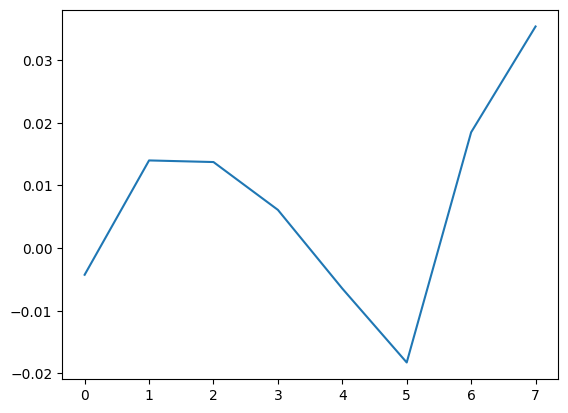

In [13]:
plt.plot(mag_list)

In [14]:
mag_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/mag_"+str(i)+".dat")
    mag_list_.append(tmp)
    
mag_list=np.array(mag_list_)

In [15]:
s_s_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/s_s_"+str(i)+".dat")
    s_s_list_.append(tmp)
    
s_s_list=np.array(s_s_list_)

In [16]:
t_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/t_"+str(i)+".dat")
    t_list_.append(tmp)
    
t_list=np.array(t_list_)

In [17]:
tx_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/tx_"+str(i)+".dat")
    tx_list_.append(tmp)
    
tx_list=np.array(tx_list_)

In [18]:
tx_tx_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/tx_tx_"+str(i)+".dat")
    tx_tx_list_.append(tmp)
    
tx_tx_list=np.array(tx_tx_list_)

In [19]:
nskip=1
s_s=np.mean(s_s_list[nskip:], axis=0)

In [20]:
tmp=s_s
ft=np.array(
    [
        [
            np.sum([s_s[x,t]*np.cos(2.0*np.pi*k*x/Lx) for x in range(Lx)]) / Lx 
            for t in range(r*Lx)]
        for k in range(Lx)])

In [21]:
alat=2.0*np.pi/Lx

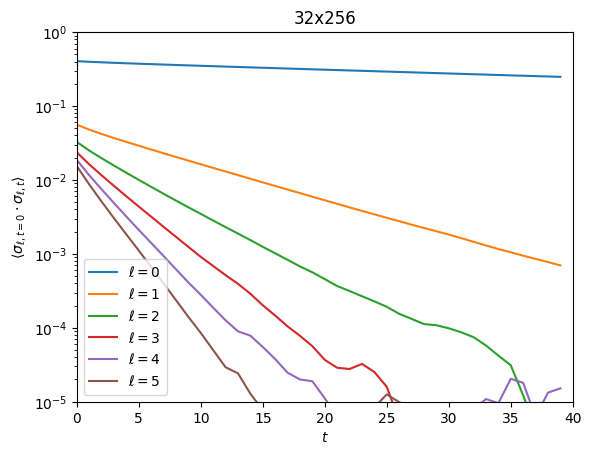

In [22]:
plt.plot(ft[0][:40], label="$\\ell=0$")
plt.plot(ft[1][:40], label="$\\ell=1$")
plt.plot(ft[2][:40], label="$\\ell=2$")
plt.plot(ft[3][:40], label="$\\ell=3$")
plt.plot(ft[4][:40], label="$\\ell=4$")
plt.plot(ft[5][:40], label="$\\ell=5$")

# t = np.arange(0,40)
# Delta=1.0/8.0
# ct = 100.0*np.exp(-t*alat*Delta)
# plt.plot(t,ct, ls="dashed")

plt.ylim(0.00001, 1.0)
plt.xlim(0.0, 40.0)

plt.ylabel("$\\langle \\sigma_{\\ell,t=0} \cdot \\sigma_{\\ell,t} \\rangle$")
plt.xlabel("$t$")

plt.title("32x256")

plt.legend()

plt.yscale("log")

# plt.savefig("sigma.eps", bbox_inches="tight")

In [23]:
# plt.plot(ft[0][:15], label="$\\ell=0$")
# plt.plot(ft[1][:15], label="$\\ell=1$")
# plt.plot(ft[2][:15], label="$\\ell=2$")
# plt.plot(ft[3][:15], label="$\\ell=3$")
# plt.plot(ft[4][:15], label="$\\ell=4$")
# plt.plot(ft[5][:15], label="$\\ell=5$")
# plt.plot(ft[6][:15], label="$\\ell=6$")


# # for ell in range(7):
# #     t = np.arange(0,16)
# #     ct = np.exp(-t*alat*(Delta+ell))
# #     plt.plot(t, ct/ct[0], ls="dashed", c="gray", 
# #              alpha=0.5,
# #              label="$\\ell=$"+str(ell)+" analytic")

# plt.yscale("log")

# plt.ylabel("$\\langle \\sigma_{k,t=0} \cdot \\sigma_{k,t} \\rangle$")
# plt.xlabel("$t$")

# plt.title("32x256")

# plt.legend()

# plt.xlim(0.0,16.0)
# plt.ylim(1.0e-3,1.0)

# # plt.savefig("sigma.eps", bbox_inches="tight")

In [24]:
def axpb(x, a, b):
    return a*x + b

In [25]:
delta_list=[]

0.011959476654836987 -0.930431178191423


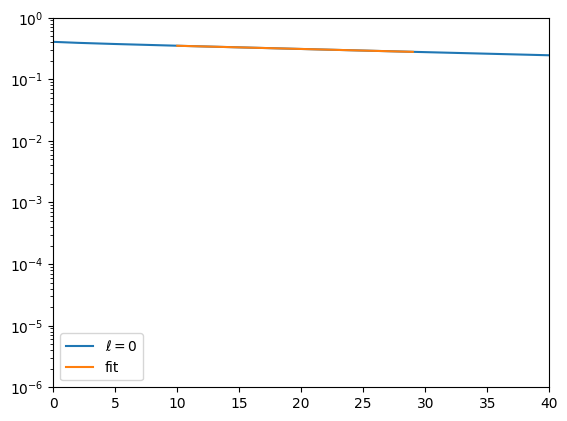

In [26]:
ell=0

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=10
xmax=30
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [27]:
0.016259087308350503 / (2.0*np.pi/32)

0.08280685168917383

0.1155426755676065 -2.961611094464495


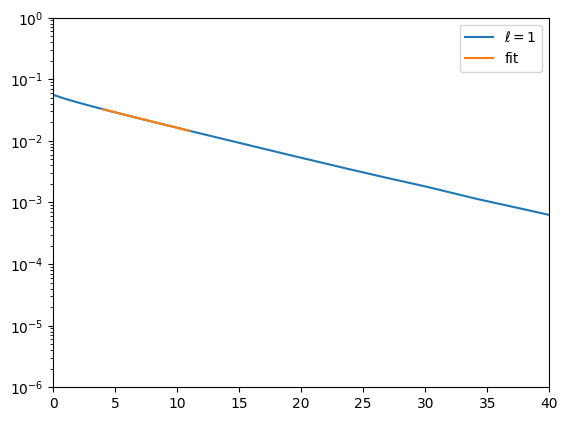

In [28]:
ell=1

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=4
xmax=12
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

0.21503331986336516 -3.526191019456313


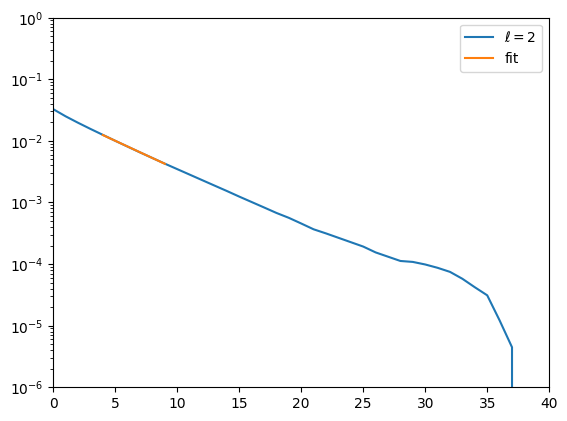

In [29]:
ell=2

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=4
xmax=10
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

0.3205418646141387 -3.826348633245872


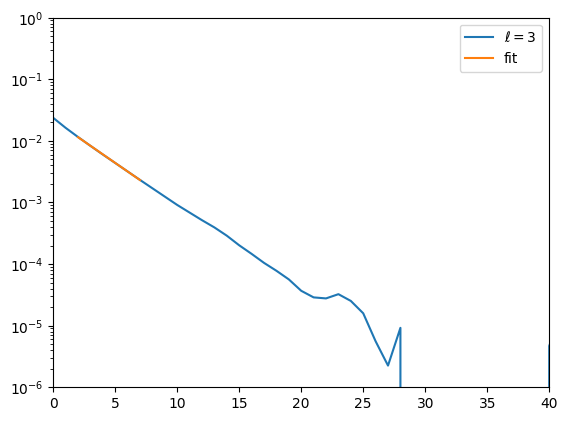

In [30]:
ell=3

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=2
xmax=8
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

0.42960670787287114 -4.03111718770997


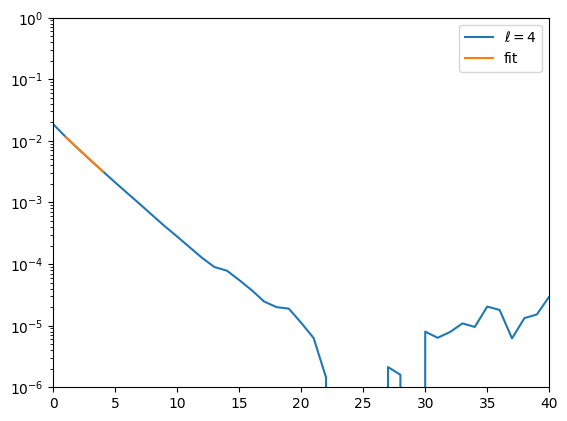

In [37]:
ell=4

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=1
xmax=5
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [38]:
delta_list

[[0, 0.011959476654836987],
 [1, 0.1155426755676065],
 [2, 0.21503331986336516],
 [3, 0.3205418646141387],
 [4, 0.42960670787287114],
 [4, 0.42960670787287114]]

In [39]:
a32_list=np.array([[0, 0.02389256709118499],
 [1, 0.22255784720193167],
 [2, 0.4137005128984015],
 [3, 0.5998641605815322],
 [4, 0.78630383991516]])

In [40]:
a48_list=np.array([[0, 0.016259087308350503],
 [1, 0.1520023212359083],
 [2, 0.2830264524101229],
 [3, 0.4162099802375052],
 [4, 0.5563355332259683]])

In [41]:
a32_list.T[1]/(np.pi*2.0/32.0)

array([0.12168384, 1.13347781, 2.10695941, 3.05508308, 4.00461257])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


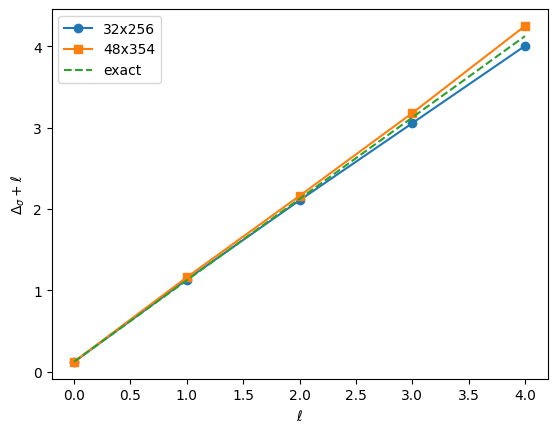

In [42]:
plt.plot(a32_list.T[0], a32_list.T[1]/(np.pi*2.0/32.0), label="32x256", marker="o")
plt.plot(a48_list.T[0], a48_list.T[1]/(np.pi*2.0/48.0), label="48x354", marker="s")

x=np.arange(5)
plt.plot(x, x+1.0/8, ls="dashed", label="exact")

plt.xlabel("$\\ell$")
plt.ylabel("$\\Delta_\\sigma+\\ell$")

plt.legend()

plt.savefig("sigma_scaling.eps", bbox_inches="tight")

In [43]:
nskip=1
tmp2=np.array([tx_tx_list[i]-tx_list[i]**2 for i in range(nskip,len(nrange))])
tmp=np.mean(tmp2, axis=0)

ft=np.array(
    [
        [
            np.sum([tmp[x,t]*np.cos(2.0*np.pi*k*x/Lx) for x in range(Lx)]) / Lx 
            for t in range(r*Lx)]
        for k in range(Lx)])

In [44]:
alat=2.0*np.pi/Lx

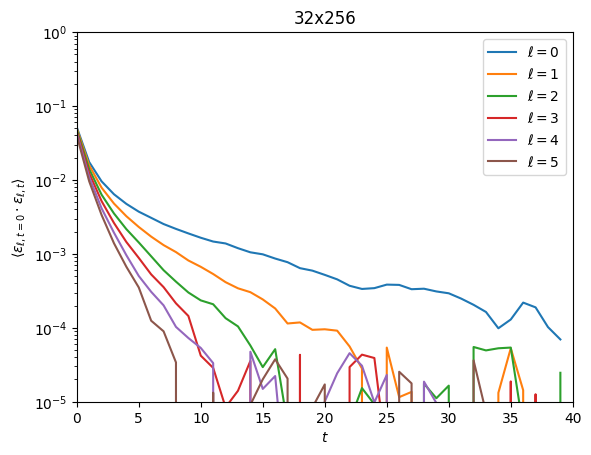

In [45]:
plt.plot(ft[0][:40], label="$\\ell=0$")
plt.plot(ft[1][:40], label="$\\ell=1$")
plt.plot(ft[2][:40], label="$\\ell=2$")
plt.plot(ft[3][:40], label="$\\ell=3$")
plt.plot(ft[4][:40], label="$\\ell=4$")
plt.plot(ft[5][:40], label="$\\ell=5$")

# t = np.arange(0,40)
# Delta=1.0/8.0
# ct = 100.0*np.exp(-t*alat*Delta)
# plt.plot(t,ct, ls="dashed")

plt.ylim(0.00001, 1.0)
plt.xlim(0.0, 40.0)

plt.ylabel("$\\langle \\epsilon_{\\ell,t=0} \cdot \\epsilon_{\\ell,t} \\rangle$")
plt.xlabel("$t$")

plt.title("32x256")

plt.legend()

plt.yscale("log")

# plt.savefig("sigma.eps", bbox_inches="tight")

In [46]:
def axpb(x, a, b):
    return a*x + b

In [47]:
def two_exp(x, E1, E2, A1, A2):
    return A1*np.exp(-E1*x) + A2*np.exp(-E2*x)

In [48]:
def three_exp(x, E1, E2, E3, A1, A2, A3):
    return A1*np.exp(-E1*x) + A2*np.exp(-E2*x) + A3*np.exp(-E3*x)

In [49]:
def three_exp_fixedE(x, E3, A1, A2, A3):
    E1=1.0*a_lat; E2=2.0*a_lat
    return A1*np.exp(-E1*x) + A2*np.exp(-E2*x) + A3*np.exp(-E3*x)

In [50]:
def two_exp_fixedE(x, A1, A2):
    E1=1.0*a_lat; E2=2.0*a_lat
    return A1*np.exp(-E1*x) + A2*np.exp(-E2*x)

In [54]:
a_lat=(np.pi*2.0/Lx)

/scratch/200753.1.ood/ipykernel_994786/2869382812.py:2: RuntimeWarning: overflow encountered in exp
  return A1*np.exp(-E1*x) + A2*np.exp(-E2*x)


1.3312278741501555 9.182924799146463


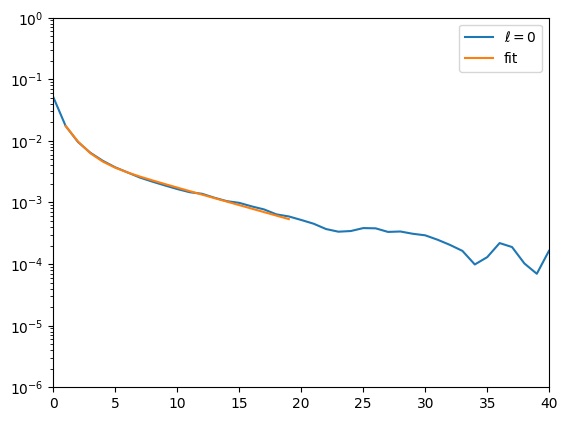

In [58]:
ell=0
y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))



# xmin=1
# xmax=20
# x=np.arange(xmin, xmax)
# [E1, E2, E3, A1, A2, A3], var = sp.optimize.curve_fit( three_exp, x, y[xmin:xmax] )
# plt.plot( x, three_exp(x, E1, E2, E3, A1, A2, A3), label="fit" )



# xmin=1
# xmax=20
# x=np.arange(xmin, xmax)
# [E3, A1, A2, A3], var = sp.optimize.curve_fit( three_exp_fixedE, x, y[xmin:xmax] )
# plt.plot( x, three_exp_fixedE(x, E3, A1, A2, A3), label="fit" )



# xmin=1
# xmax=20
# x=np.arange(xmin, xmax)
# [E1, E2, E3, A1, A2, A3], var = sp.optimize.curve_fit( three_exp, x, y[xmin:xmax] )
# plt.plot( x, three_exp(x, E1, E2, E3, A1, A2, A3), label="fit" )


xmin=1
xmax=20
x=np.arange(xmin, xmax)
[E1, E2, A1, A2], var = sp.optimize.curve_fit( two_exp, 
                                              x, y[xmin:xmax], 
                                              [1.0/a_lat, 2.0/a_lat, 0.1, 0.1] )
plt.plot( x, two_exp(x, E1, E2, A1, A2), label="fit" )


# xmin=1
# xmax=8
# x=np.arange(xmin, xmax)
# [A1, A2], var = sp.optimize.curve_fit( two_exp_fixedE, x, y[xmin:xmax] )
# plt.plot( x, two_exp_fixedE(x, A1, A2), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

# xmin=1
# xmax=20
# x=np.arange(xmin, xmax)
# plt.plot( x, 0.008*np.exp(-x*a_lat), label="exp(-x)" )

# xmin=0
# xmax=8
# x=np.arange(xmin, xmax)
# plt.plot( x, 0.018*np.exp(-2.0*x*a_lat), label="exp(-2.0*x)" )

print(E1/a_lat, E2/a_lat)
# print(E1/a_lat, E2/a_lat, E3/a_lat)
# print(E3/a_lat)

In [56]:
A1

0.029072903715648628

In [55]:
A2

0.0061319296370381145

In [56]:
A3

0.04022621985371537

$$
    t \equiv \sum_\mu (s_x-s_{x+\mu})^2
$$

In [42]:
nskip=1
tmp2=np.array([t_t_list[i]-t_list[i]**2 for i in range(nskip,len(nrange))])
tmp=np.mean(tmp2, axis=0)

ft=np.array(
    [
        [
            np.sum([tmp[x,t]*np.cos(2.0*np.pi*k*x/Lx) for x in range(Lx)]) / Lx 
            for t in range(r*Lx)]
        for k in range(Lx)])

NameError: name 't_t_list' is not defined

In [ ]:
alat=2.0*np.pi/Lx

In [ ]:
plt.plot(ft[0][:40], label="$\\ell=0$")
plt.plot(ft[1][:40], label="$\\ell=1$")
plt.plot(ft[2][:40], label="$\\ell=2$")
plt.plot(ft[3][:40], label="$\\ell=3$")
plt.plot(ft[4][:40], label="$\\ell=4$")
plt.plot(ft[5][:40], label="$\\ell=5$")

# t = np.arange(0,40)
# Delta=1.0/8.0
# ct = 100.0*np.exp(-t*alat*Delta)
# plt.plot(t,ct, ls="dashed")

plt.ylim(0.00001, 1.0)
plt.xlim(0.0, 40.0)

plt.ylabel("$\\langle \\sigma_{\\ell,t=0} \cdot \\sigma_{\\ell,t} \\rangle$")
plt.xlabel("$t$")

plt.title("32x256")

plt.legend()

plt.yscale("log")

# plt.savefig("sigma.eps", bbox_inches="tight")

In [ ]:
# plt.plot(ft[0][:15], label="$\\ell=0$")
# plt.plot(ft[1][:15], label="$\\ell=1$")
# plt.plot(ft[2][:15], label="$\\ell=2$")
# plt.plot(ft[3][:15], label="$\\ell=3$")
# plt.plot(ft[4][:15], label="$\\ell=4$")
# plt.plot(ft[5][:15], label="$\\ell=5$")
# plt.plot(ft[6][:15], label="$\\ell=6$")


# # for ell in range(7):
# #     t = np.arange(0,16)
# #     ct = np.exp(-t*alat*(Delta+ell))
# #     plt.plot(t, ct/ct[0], ls="dashed", c="gray", 
# #              alpha=0.5,
# #              label="$\\ell=$"+str(ell)+" analytic")

# plt.yscale("log")

# plt.ylabel("$\\langle \\sigma_{k,t=0} \cdot \\sigma_{k,t} \\rangle$")
# plt.xlabel("$t$")

# plt.title("32x256")

# plt.legend()

# plt.xlim(0.0,16.0)
# plt.ylim(1.0e-3,1.0)

# # plt.savefig("sigma.eps", bbox_inches="tight")

In [ ]:
def axpb(x, a, b):
    return a*x + b

In [ ]:
def two_exp(x, E1, E2, A1, A2):
    return A1*np.exp(-E1*x) + A2*np.exp(-E2*x)

In [ ]:
def two_exp_fixedE(x, A1, A2):
    E1=1; E2=2
    return A1*np.exp(-E1*x) + A2*np.exp(-E2*x)

In [ ]:
a_lat=(np.pi*2.0/48.0)

In [ ]:
ell=0
y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

# xmin=1
# xmax=20
# x=np.arange(xmin, xmax)
# [E1, E2, A1, A2], var = sp.optimize.curve_fit( two_exp, x, y[xmin:xmax] )
# plt.plot( x, two_exp(x, E1, E2, A1, A2), label="fit" )

# xmin=1
# xmax=5
# x=np.arange(xmin, xmax)
# [A1, A2], var = sp.optimize.curve_fit( two_exp_fixedE, x, y[xmin:xmax] )
# plt.plot( x, two_exp_fixedE(x, A1, A2), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

xmin=1
xmax=20
x=np.arange(xmin, xmax)
plt.plot( x, 0.008*np.exp(-x*a_lat), label="exp(-x)" )

xmin=0
xmax=8
x=np.arange(xmin, xmax)
plt.plot( x, 0.018*np.exp(-2.0*x*a_lat), label="exp(-2.0*x)" )

# print(E1/a_lat, E2/a_lat)

$$
    t \equiv \sum_\mu (s_x-s_{x+\mu})^2
$$

In [ ]:
delta_list=[]

In [ ]:
ell=0

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=0
xmax=2
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [ ]:
ell=0

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=7
xmax=20
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [ ]:
a48_list.T[1]/(np.pi*2.0/48.0)

In [ ]:
ell=1

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=4
xmax=12
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [ ]:
ell=2

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=4
xmax=10
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [ ]:
ell=3

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=2
xmax=8
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [ ]:
ell=4

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=2
xmax=5
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [ ]:
delta_list

In [ ]:
a32_list=np.array(
[[0, 0.19395521240150024],
 [1, 0.4235009274364022],
 [2, 0.608073640924816],
 [3, 0.9238354571740328],
 [4, 1.0874192327676853]]
)

In [ ]:
a48_list=np.array(
[[0, 0.15410954951424244],
 [1, 0.32503912755985986],
 [2, 0.47677956179712866],
 [3, 0.6260486320704013],
 [4, 0.9170758619156727]]
)

In [ ]:
a32_list.T[1]/(np.pi*2.0/32.0)

In [ ]:
a48_list.T[1]/(np.pi*2.0/48.0)

In [ ]:
plt.plot(a32_list.T[0], a32_list.T[1]/(np.pi*2.0/32.0), label="32x256", marker="o")
plt.plot(a48_list.T[0], a48_list.T[1]/(np.pi*2.0/48.0), label="48x354", marker="s")

x=np.arange(5)
plt.plot(x, x+1.0, ls="dashed", label="exact")

plt.xlabel("$\\ell$")
plt.ylabel("$\\Delta_\\epsilon+\\ell$")

plt.legend()

plt.savefig("epsilon_scaling.eps", bbox_inches="tight")